In [44]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px

In [16]:
connection = sqlite3.connect("/Users/beans/Desktop/Mod-3-Project/data/themepark.db")
cursor = connection.cursor()

In [17]:
time_waited = """
SELECT visit_id,AVG(wait_minutes) as minutes_waited, AVG(satisfaction_rating) as rating_at_park
FROM fact_ride_events
WHERE wait_minutes iS NOT NULL
GROUP BY visit_id
"""

cursor.execute(time_waited)

In [18]:
time_waiteddf = pd.read_sql_query(time_waited, connection)
time_waiteddf.value_counts()

visit_id  minutes_waited  rating_at_park
2         36.750000       2.500000          1
36        28.000000       3.500000          1
27        10.000000       1.000000          1
28        85.000000       3.000000          1
29        46.666667       2.000000          1
31        32.000000       5.000000          1
33        60.500000       2.500000          1
35        45.000000       5.000000          1
37        13.000000       2.000000          1
3         38.333333       4.000000          1
38        65.000000       1.000000          1
40        47.500000       2.500000          1
41        71.000000       3.000000          1
42        28.500000       4.000000          1
43        17.000000       2.000000          1
46        6.000000        3.000000          1
26        63.000000       1.000000          1
24        45.000000       4.500000          1
21        39.000000       4.250000          1
19        25.666667       4.000000          1
18        52.666667       3.333333     

<bound method PathCollection.set of <matplotlib.collections.PathCollection object at 0x15327bb00>>

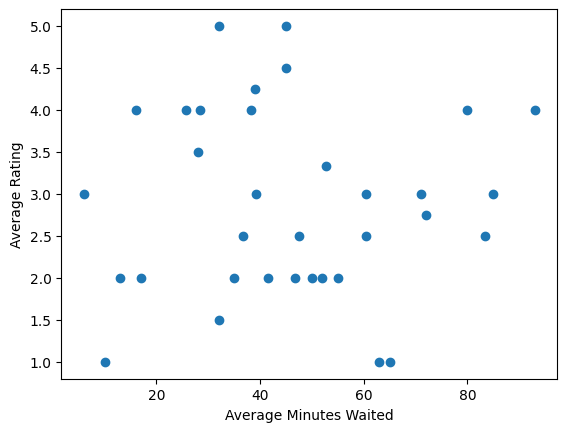

In [19]:
scatterplt = plt.scatter(time_waiteddf['minutes_waited'],time_waiteddf['rating_at_park'],marker='o')
#no relationship between minutes waited and rating of ride
scatterplt.axes.set_xlabel('Average Minutes Waited')
scatterplt.axes.set_ylabel('Average Rating')
scatterplt.set

In [28]:
attraction_wait = """
SELECT da.attraction_name, 
       ROUND(AVG(fre.wait_minutes),2) as average_wait,
       ROUND(AVG(fre.satisfaction_rating),2) as average_rating
FROM fact_ride_events fre
JOIN dim_attraction da ON fre.attraction_id = da.attraction_id
WHERE fre.wait_minutes IS NOT NULL
GROUP BY da.attraction_name
"""

cursor.execute(attraction_wait)

In [29]:
attractiondf = pd.read_sql_query(attraction_wait,connection)
attractiondf

,attraction_name,average_wait,average_rating
0,Dragon Drop,56.43,3.29
1,Galaxy Coaster,44.33,3.08
2,Pirate Splash!,50.94,2.94
3,Space Theater,40.44,2.78
4,Tiny Trucks,37.07,3.36
5,Wild Rapids,45.25,2.25


In [74]:
waitbar =px.bar(attractiondf,'attraction_name','average_wait', text='average_wait', title='Average Wait Per Attraction', height=650)
waitbar.update_layout(xaxis_title='Attraction Name', yaxis_title='Average Wait in Minutes', font=dict(size=15))
waitbar.update_traces(textposition='outside')

In [75]:
category = """
SELECT da.attraction_name, da.category, 
       ROUND(AVG(fre.wait_minutes),2) as average_wait,
       ROUND(AVG(fre.satisfaction_rating),2) as average_rating
FROM fact_ride_events fre
JOIN dim_attraction da ON fre.attraction_id = da.attraction_id
WHERE fre.wait_minutes IS NOT NULL
GROUP BY da.category
"""

cursor.execute(category)

In [ ]:
catdf = pd.read_sql_query(category,connection)

catdf



,attraction_name,category,average_wait,average_rating
3,Pirate Splash!,Water,49.12,2.72


In [130]:
catbar = px.bar(catdf, 'category', 'average_wait', text='average_wait', title = 'Average Wait per Ride Category', width =750 ,height =650)
catbar.update_layout(xaxis_title='Ride Category', yaxis_title='Average Wait in Minutes', font=dict(size=15))
catbar.update_traces(marker_color = ['ForestGreen', 'RoyalBlue', 'RoyalBlue', 'FireBrick'],textposition='outside')
catbar

In [97]:
waterfilter = """
SELECT da.attraction_name, da.category, fre.satisfaction_rating,
       fre.wait_minutes as wait,
       satisfaction_rating ating
FROM fact_ride_events fre
JOIN dim_attraction da ON fre.attraction_id = da.attraction_id
WHERE (fre.wait_minutes IS NOT NULL) AND (da.category IS 'Water')
"""

cursor.execute(waterfilter)

In [101]:
filter = pd.read_sql_query(waterfilter, connection)
filter

,attraction_name,category,satisfaction_rating,wait,ating
0,Pirate Splash!,Water,3,2,3
1,Pirate Splash!,Water,1,79,1
2,Pirate Splash!,Water,2,33,2
3,Wild Rapids,Water,4,57,4
4,Pirate Splash!,Water,2,35,2
5,Pirate Splash!,Water,1,57,1
6,Pirate Splash!,Water,4,67,4
7,Wild Rapids,Water,4,48,4
8,Wild Rapids,Water,2,49,2
9,Wild Rapids,Water,2,50,2


In [ ]:
waterscat  = px.bar(catdf, 'category','average_rating', text = 'average_rating', title = 'Average Rating per Ride ', width = 750, height=650)
waterscat.update_layout(xaxis_title='Ride Category', yaxis_title='Average Rating', font=dict(size=15))
waterscat.update_traces(marker_color = ['ForestGreen', 'RoyalBlue', 'RoyalBlue', 'FireBrick'],textposition='outside')
waterscat

In [135]:
promo = """
WITH promopurchase AS (
  SELECT *
  FROM fact_purchases fp
  JOIN fact_visits fv ON fv.visit_id = fp.visit_id
)
 SELECT promotion_code,COUNT(*) as count_of_purchases
 FROM promopurchase
 WHERE promotion_code IS NOT NULL
 GROUP BY promotion_code
"""

cursor.execute(promo)

In [137]:
promodf = pd.read_sql_query(promo,connection)
promodf

,promotion_code,count_of_purchases
0,,4
1,SUMMER25,39
2,VIPDAY,11


In [168]:
#pie chart for percentages of purchase

promotionpurch = px.pie(promodf,names=['No Promotion','SUMMER25','VIPDAY'],values='count_of_purchases',title='Purchase Percentage by Promotional Offer',height=600, width=700)
promotionpurch.update_layout(font=dict(size=18))
promotionpurch.update_traces(marker_colors = ['FireBrick', 'ForestGreen', 'RoyalBlue'],textposition='outside')
